<a href="https://colab.research.google.com/github/Venni2911/LogicMojo-AI-ML-Sept25-VenniRaj/blob/main/Venni_HW_Assignment_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [45]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [7]:
import warnings

warnings.filterwarnings('ignore')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df =  pd.read_csv('/content/drive/MyDrive/Clustering Assignment/Country-data.csv')

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
df.shape

(167, 10)

In [12]:
df1 = df.drop(['country'], axis=1)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [14]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [14]:
df1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


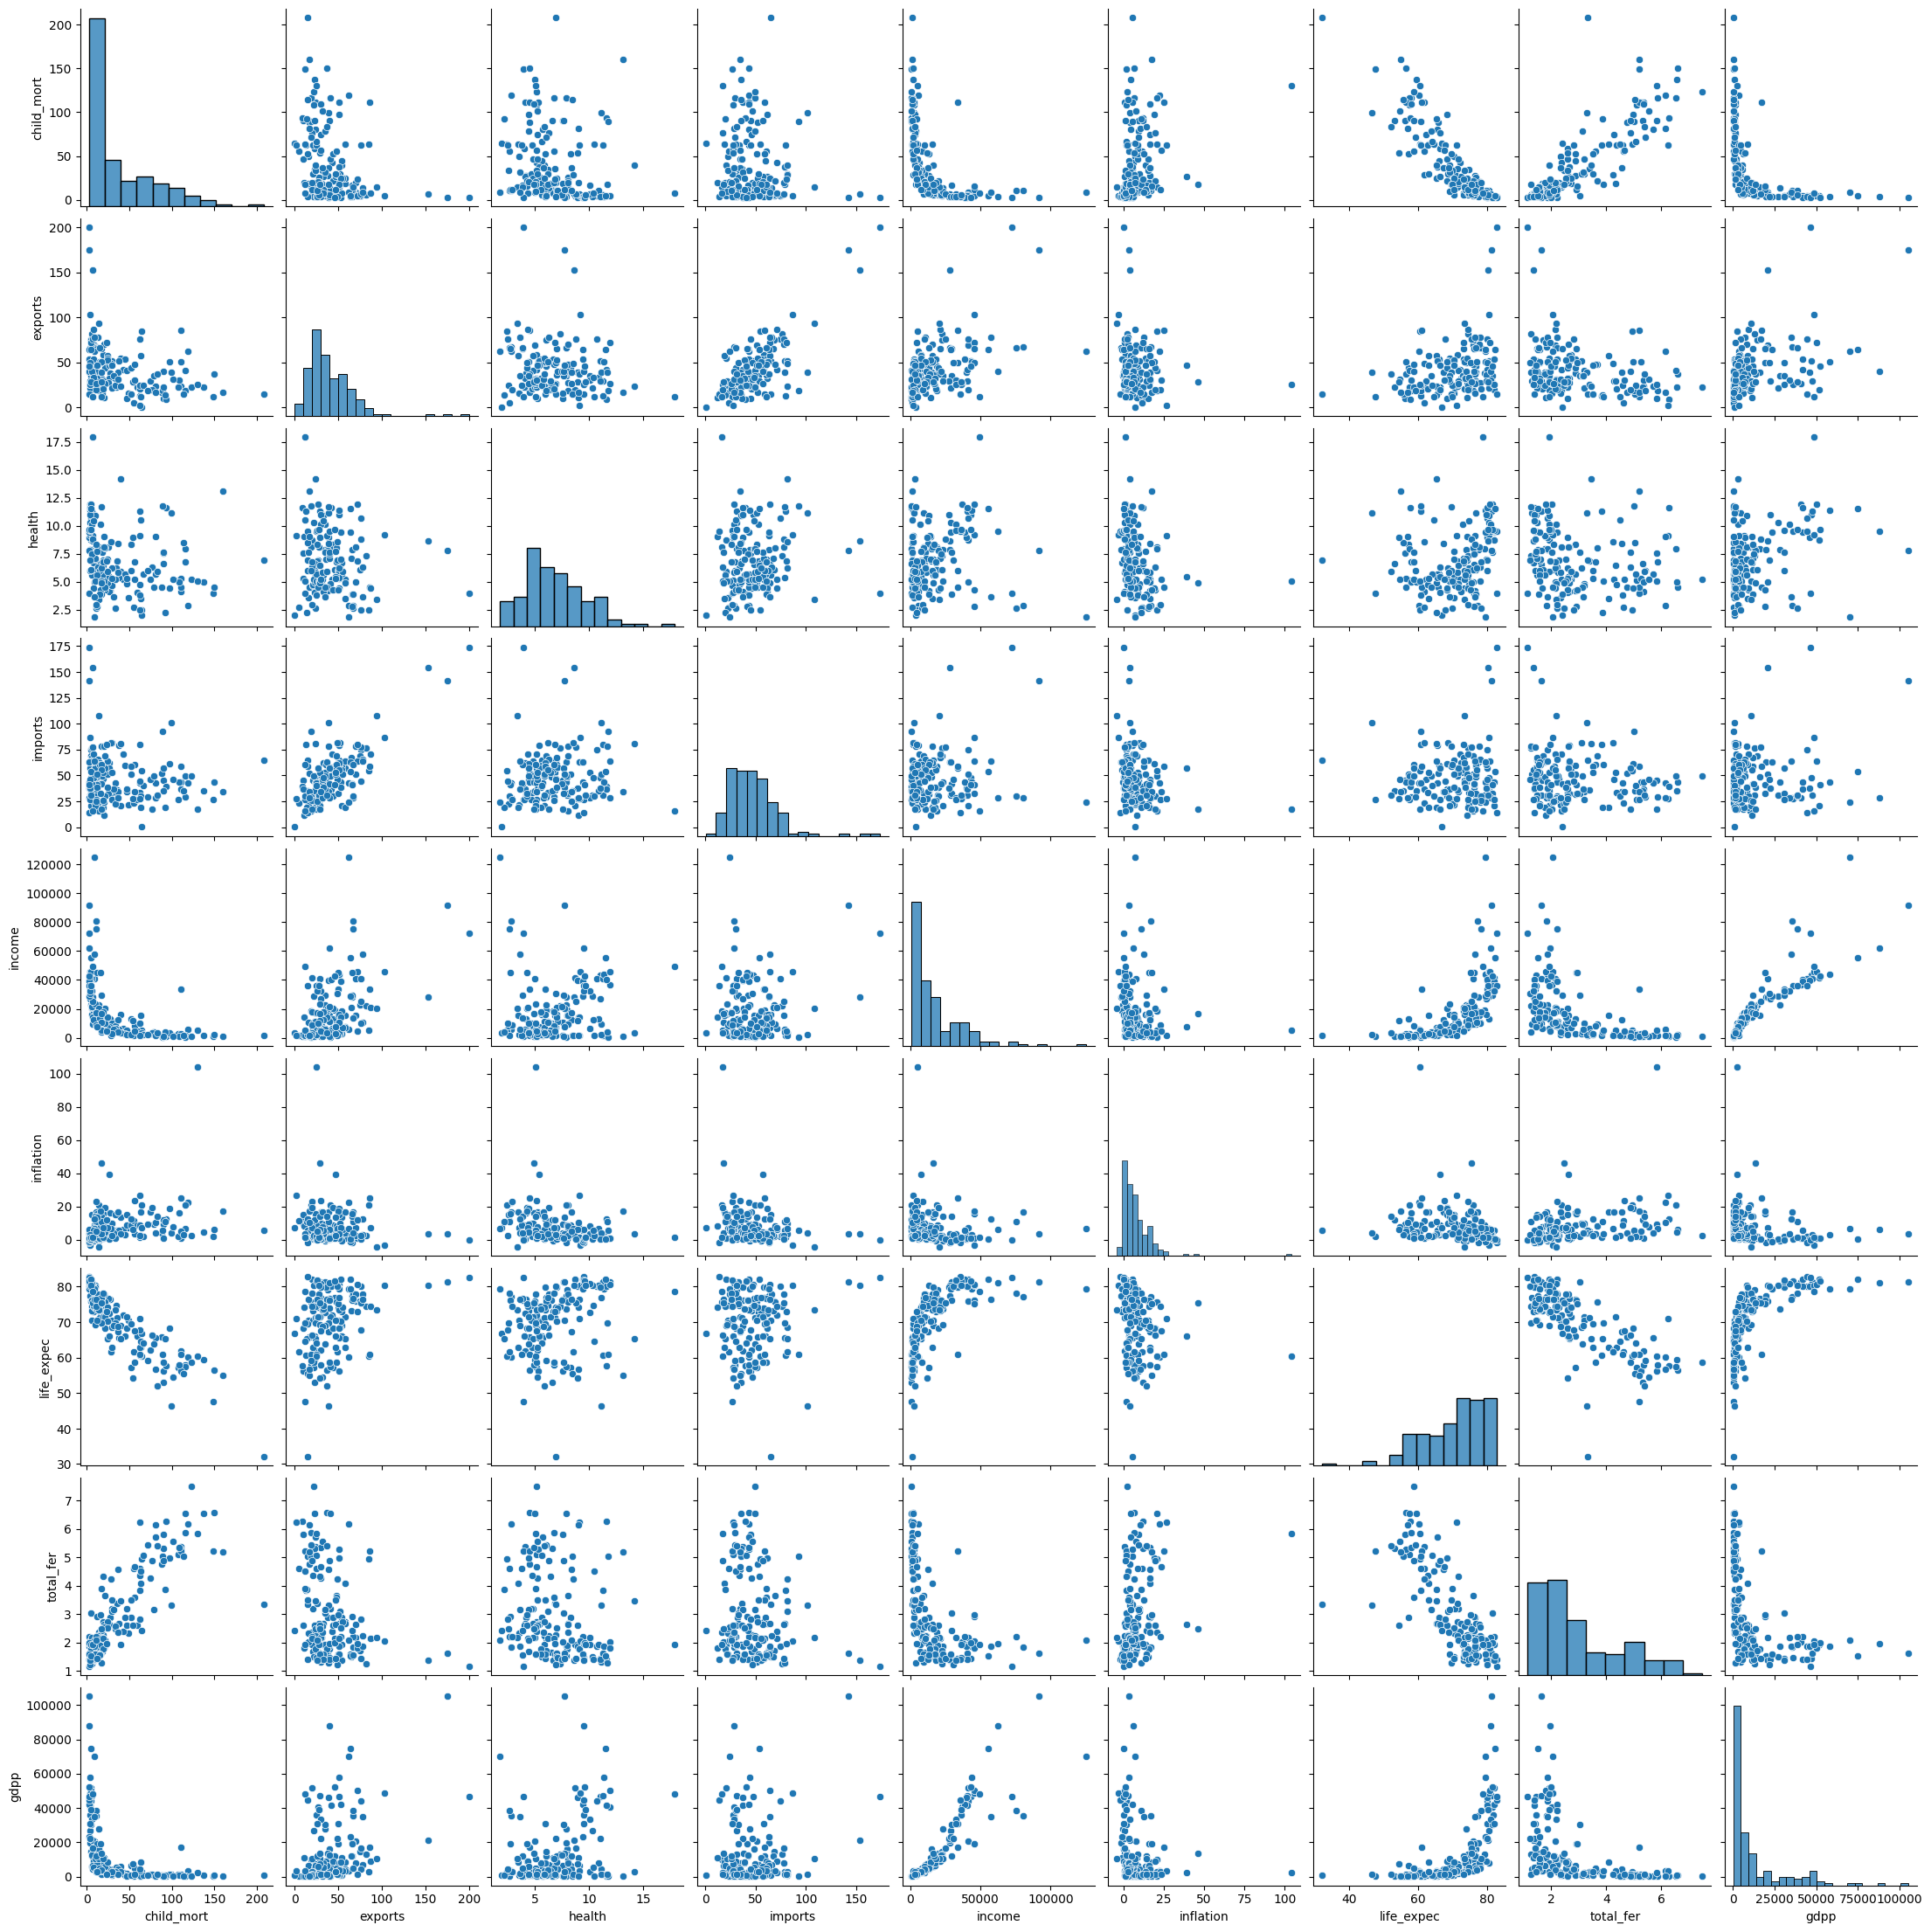

In [17]:
sns.pairplot(df1)

<Axes: xlabel='child_mort', ylabel='Count'>

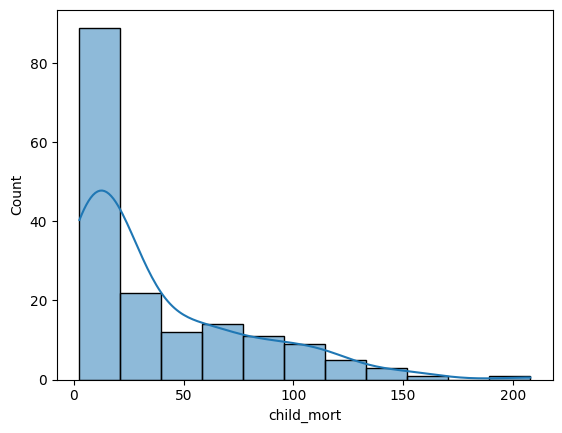

In [18]:
sns.histplot(data=df1, x='child_mort', kde=True)

<Axes: xlabel='exports', ylabel='Count'>

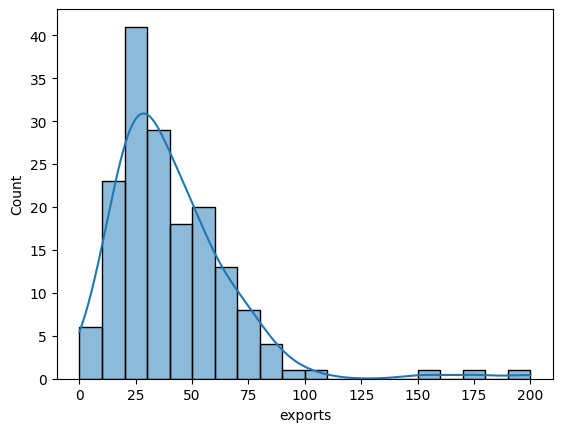

In [20]:
sns.histplot(data=df1, x='exports', kde=True)

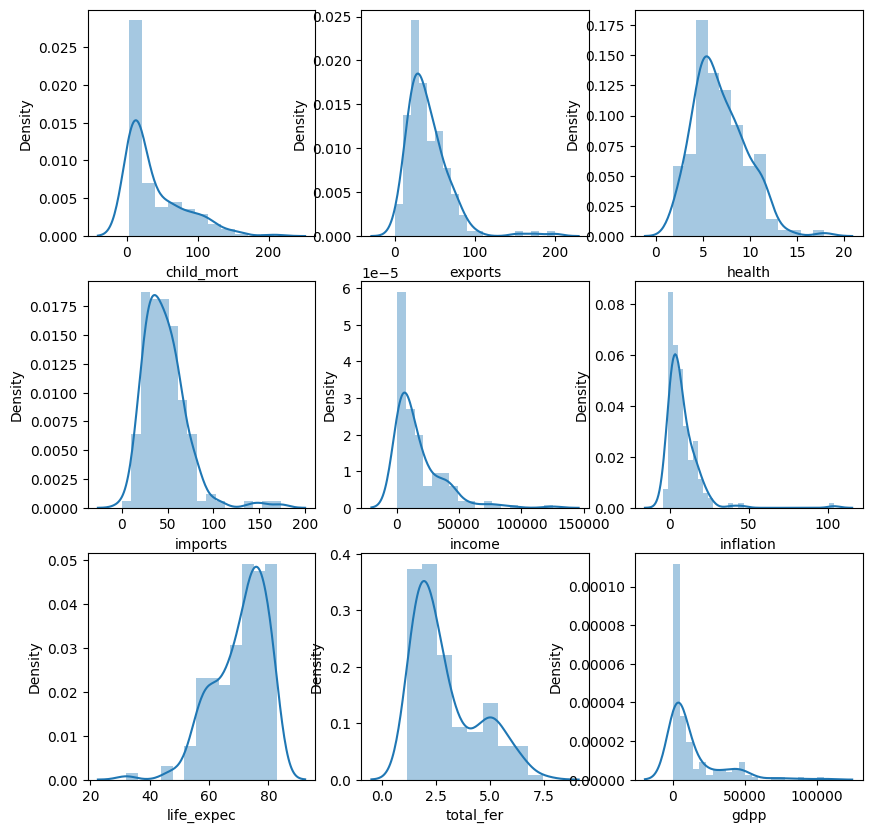

In [23]:

plt.figure(figsize = (10,10))
f = df1.columns
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df1[i[1]])

<Axes: xlabel='income'>

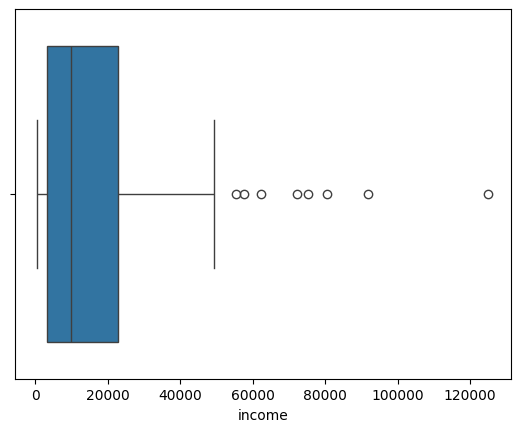

In [15]:
sns.boxplot(x=df1.income,data=df1)

<Axes: xlabel='inflation'>

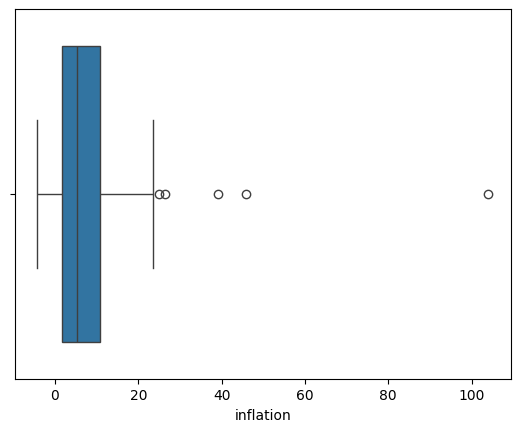

In [16]:
sns.boxplot(x=df1.inflation,data=df1)

<Axes: xlabel='gdpp'>

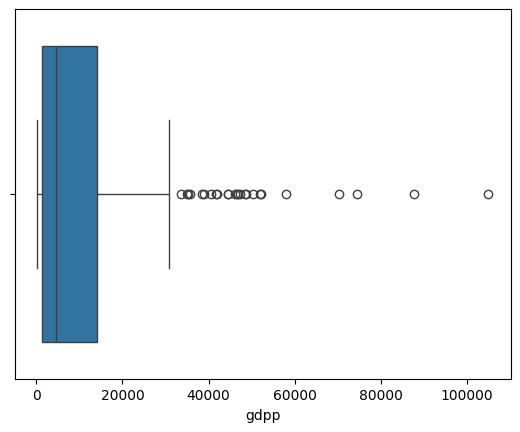

In [17]:
sns.boxplot(x=df1.gdpp,data=df1)

<Axes: xlabel='imports'>

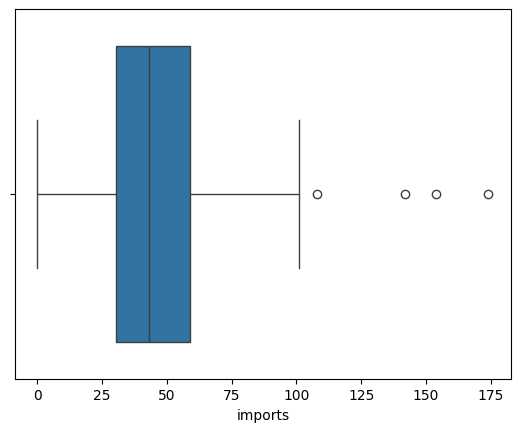

In [18]:
sns.boxplot(x=df1.imports,data=df1)

<Axes: xlabel='exports'>

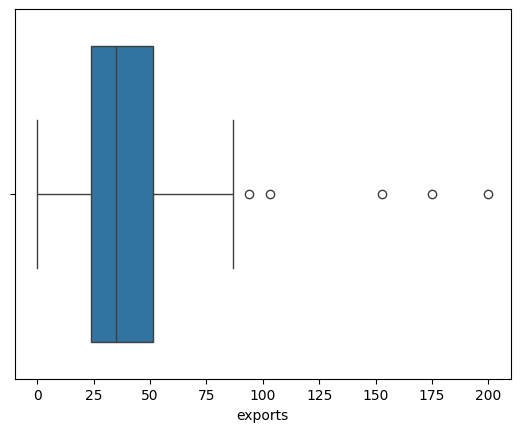

In [19]:
sns.boxplot(x=df1.exports,data=df1)

<Axes: xlabel='life_expec'>

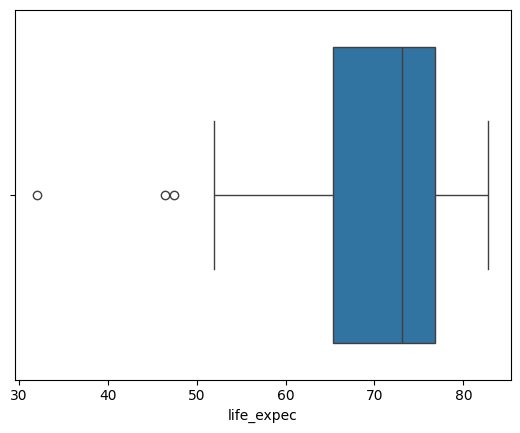

In [20]:
sns.boxplot(x=df1.life_expec,data=df1)

<Axes: xlabel='child_mort'>

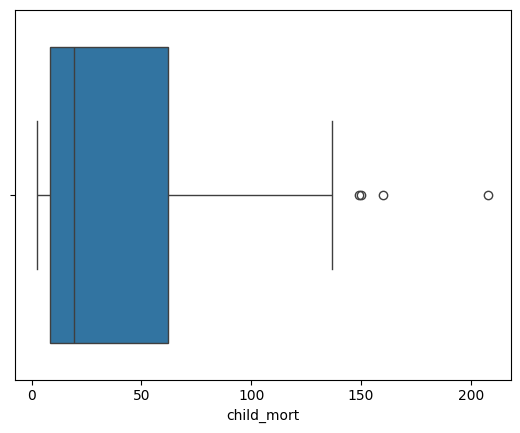

In [21]:
sns.boxplot(x=df1.child_mort,data=df1)

<Axes: xlabel='total_fer'>

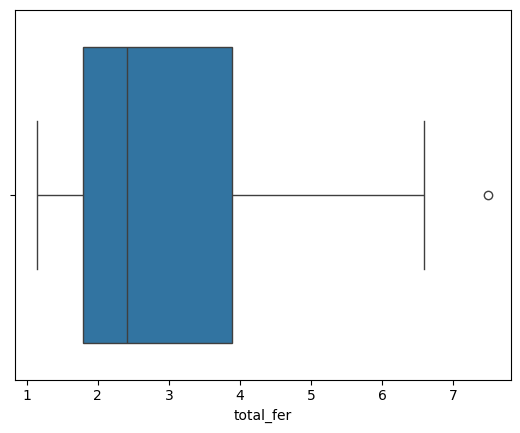

In [22]:
sns.boxplot(x=df1.total_fer,data=df1)

<Axes: xlabel='health'>

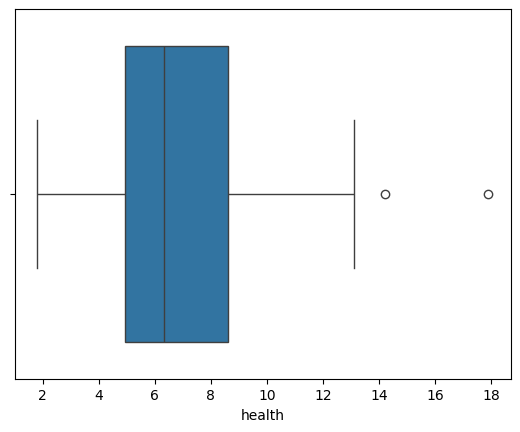

In [23]:
sns.boxplot(x=df1.health,data=df1)

In [24]:
# removing (statistical) outliers

# GDP per capita
Q1 = df1.gdpp.quantile(0.05)
Q3 = df1.gdpp.quantile(0.95)
IQR = Q3 - Q1
df = df[df1.gdpp <= Q3 + 1.5 * IQR]

# Income
Q1 = df1.income.quantile(0.05)
Q3 = df1.income.quantile(0.95)
IQR = Q3 - Q1
df = df[df1.income <= Q3 + 1.5 * IQR]

# Life expectancy
Q1 = df1.life_expec.quantile(0.05)
Q3 = df1.life_expec.quantile(0.95)
IQR = Q3 - Q1
df = df[df1.life_expec >= Q1 - 1.5 * IQR]


<Axes: xlabel='gdpp'>

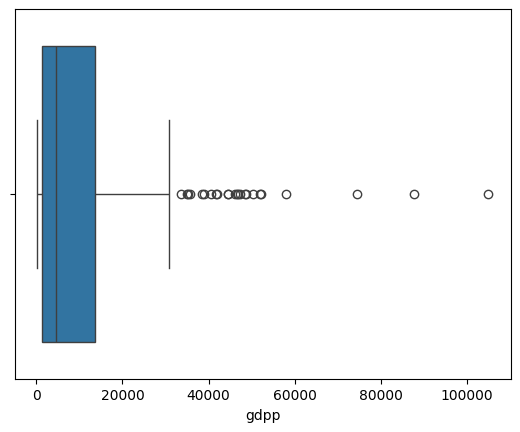

In [26]:
sns.boxplot(x=df.gdpp,data=df1)

<Axes: xlabel='income'>

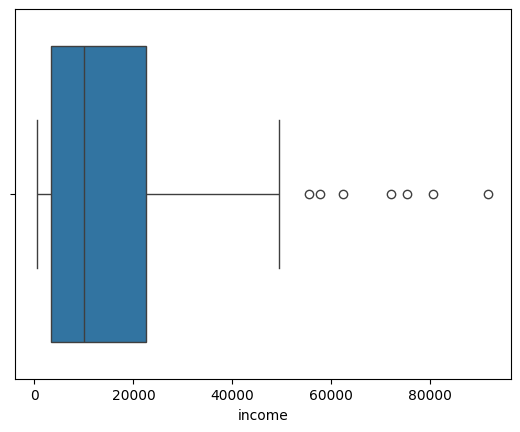

In [27]:
sns.boxplot(x=df.income,data=df1)

<Axes: xlabel='life_expec'>

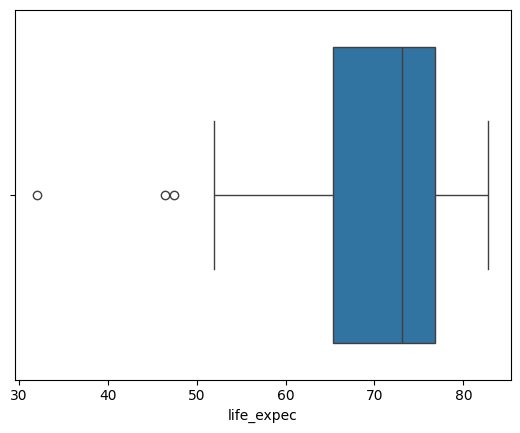

In [28]:
sns.boxplot(x = df.life_expec, data =df)

In [29]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [30]:
df2 = df.drop(['country'], axis=1)

In [31]:
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [33]:
corr = df2.corr()
corr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.315769,-0.210884,-0.131981,-0.556013,0.288408,-0.886385,0.848146,-0.484613
exports,-0.315769,1.000000,-0.107147,0.745253,0.545967,-0.107135,0.313128,-0.318194,0.417368
health,-0.210884,-0.107147,1.000000,0.086292,0.214763,-0.258836,0.224756,-0.205363,0.396334
imports,-0.131981,0.745253,0.086292,1.000000,0.172382,-0.248122,0.060556,-0.163016,0.138107
income,-0.556013,0.545967,0.214763,0.172382,1.000000,-0.161288,0.643924,-0.536197,0.904288
inflation,0.288408,-0.107135,-0.258836,-0.248122,-0.161288,1.000000,-0.239983,0.316983,-0.227032
life_expec,-0.886385,0.313128,0.224756,0.060556,0.643924,-0.239983,1.000000,-0.760447,0.600902
total_fer,0.848146,-0.318194,-0.205363,-0.163016,-0.536197,0.316983,-0.760447,1.000000,-0.458162
gdpp,-0.484613,0.417368,0.396334,0.138107,0.904288,-0.227032,0.600902,-0.458162,1.000000


<Axes: >

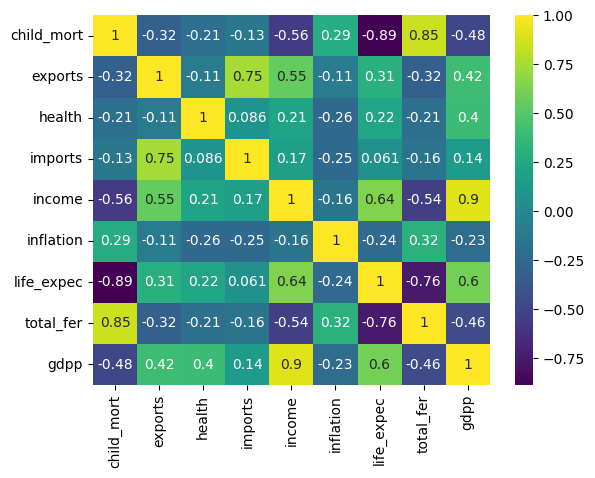

In [42]:
sns.heatmap(corr, cmap = 'viridis', annot = True)

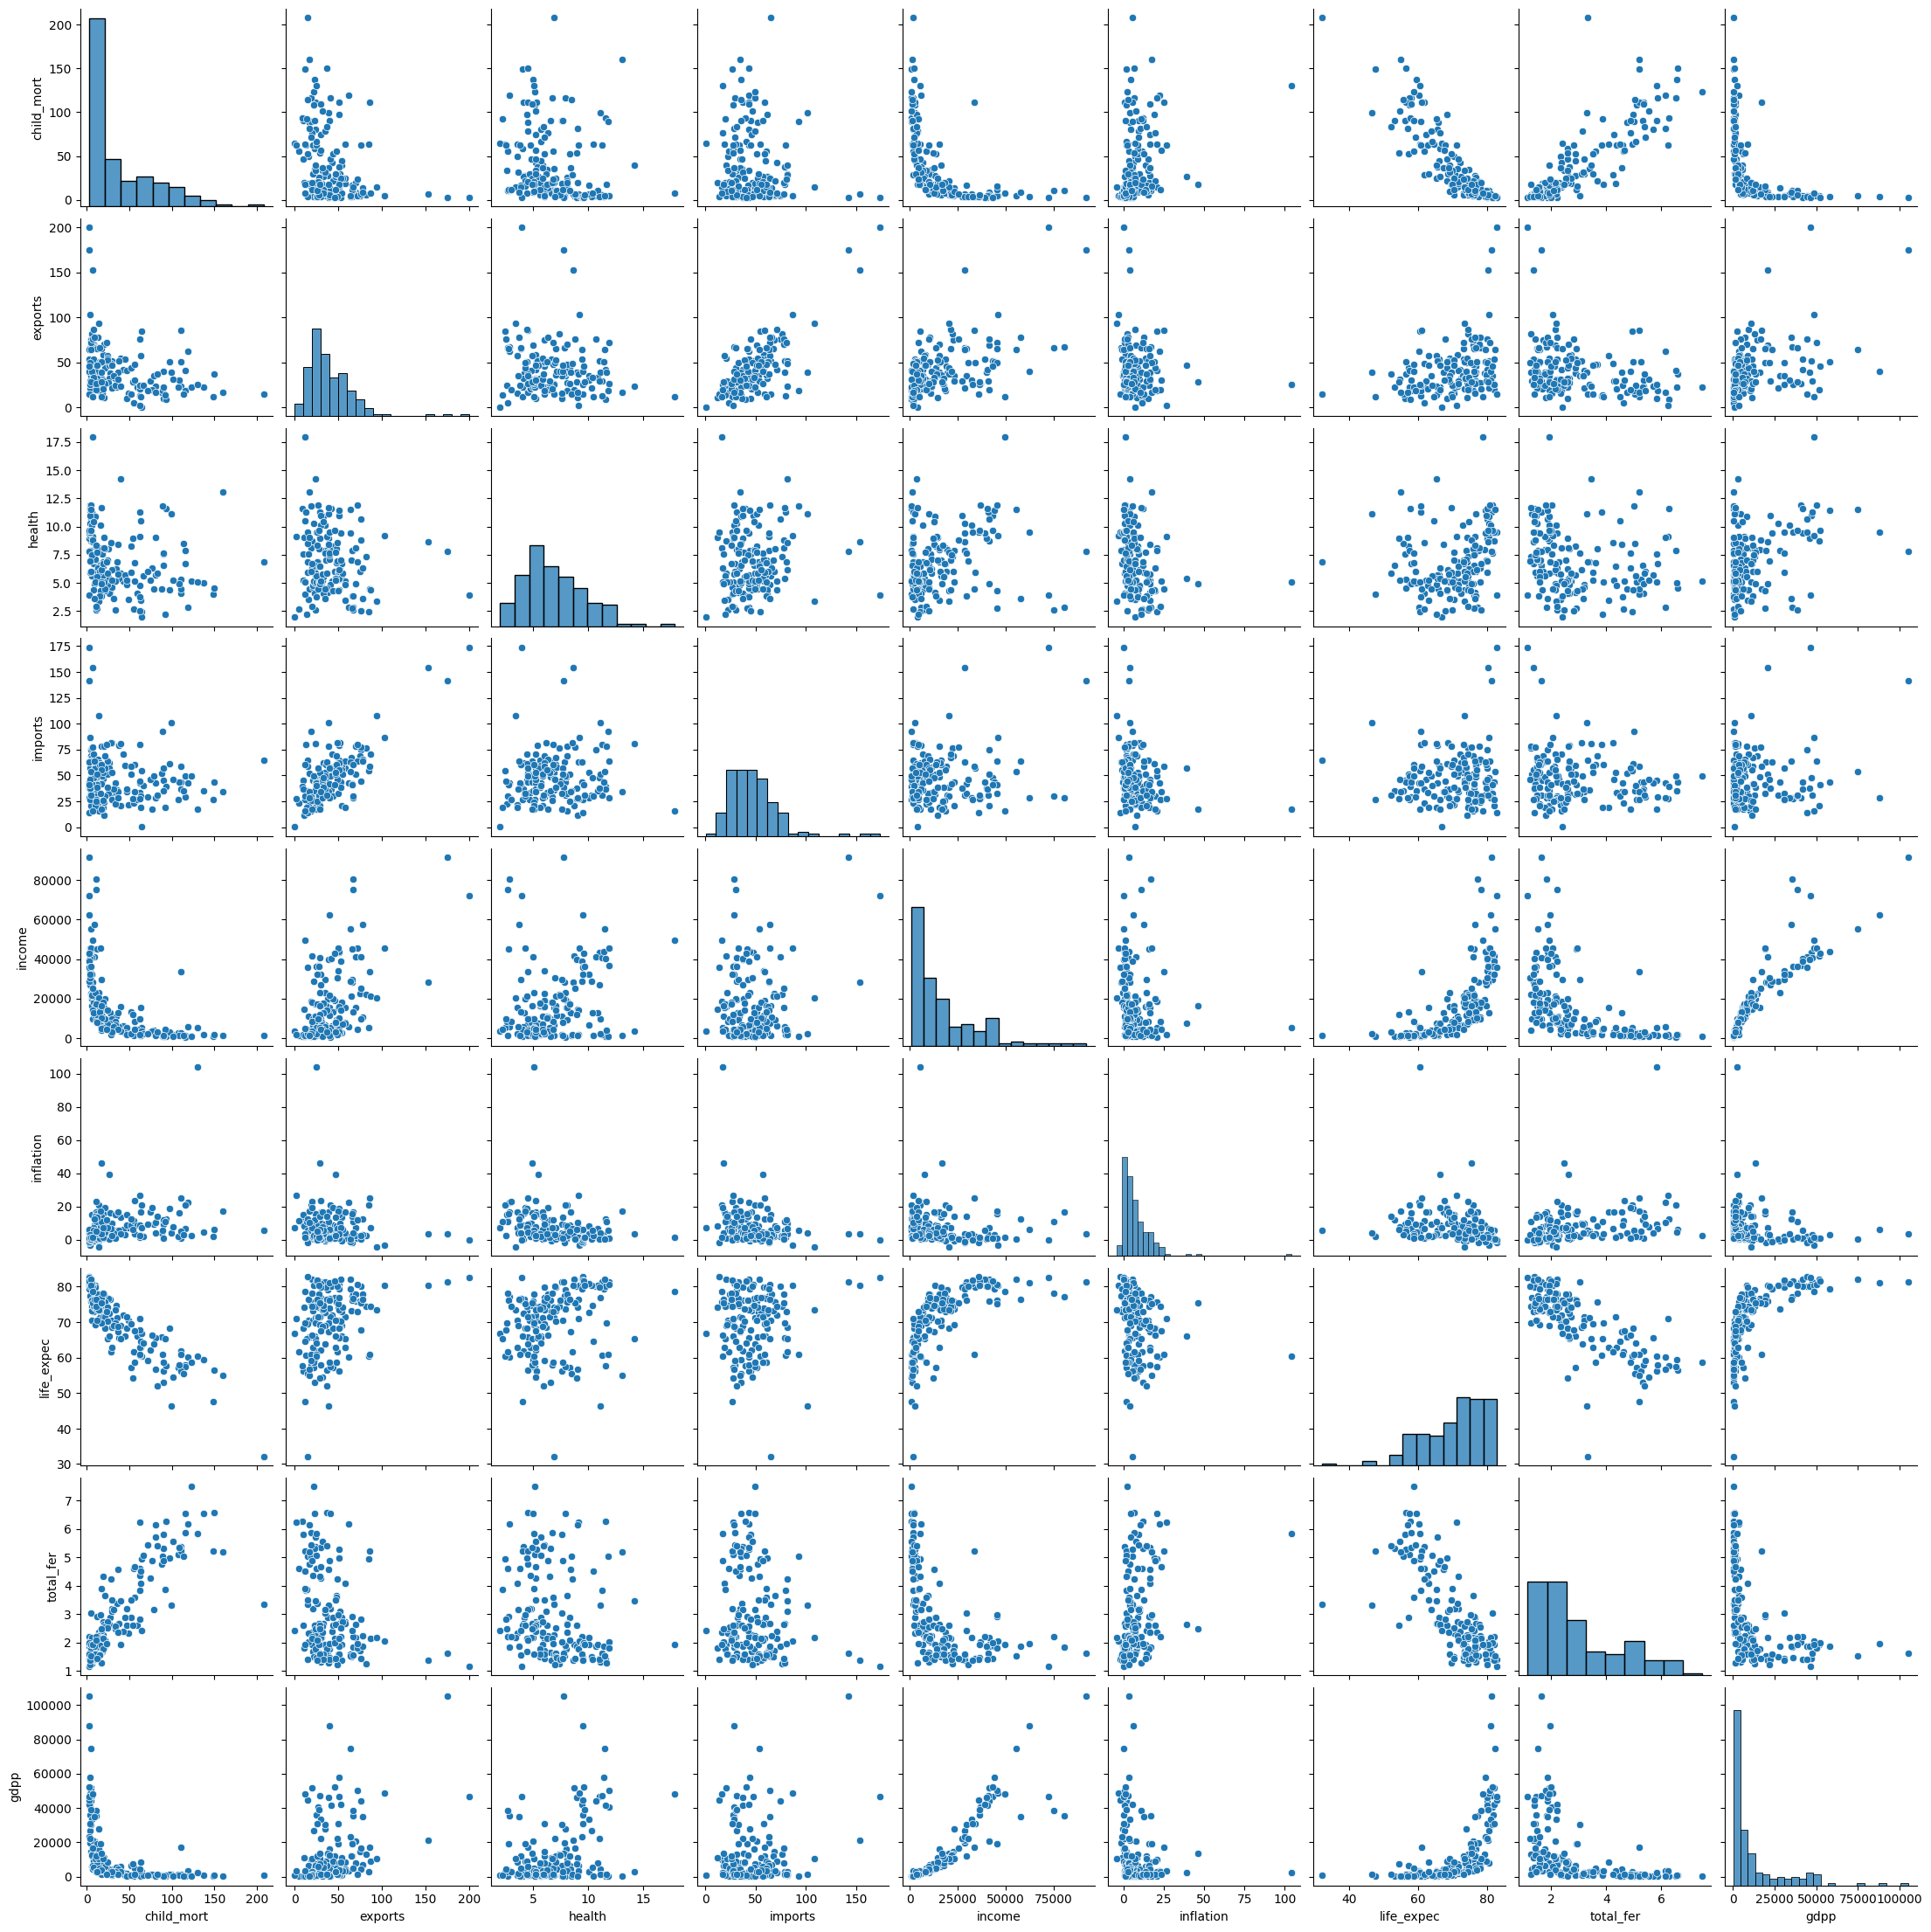

In [43]:
sns.pairplot(df2)

In [46]:
# Scaling
scaler = StandardScaler()

# fit_transform
num_df_scaled = scaler.fit_transform(df2)
num_df_scaled.shape

(166, 9)

In [47]:
df2_scaled = pd.DataFrame(num_df_scaled)
df2_scaled.columns = df2.columns
df2_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.285341,-1.132262,0.270004,-0.088197,-0.857748,0.156410,-1.613131,1.895616,-0.678732
1,-0.542572,-0.474423,-0.108804,0.065058,-0.378307,-0.311873,0.653990,-0.861767,-0.479766
2,-0.276829,-0.094338,-0.984108,-0.647370,-0.207160,0.786464,0.676549,-0.041826,-0.458953
3,2.000611,0.779125,-1.469570,-0.171037,-0.610536,1.382462,-1.173241,2.120438,-0.511268
4,-0.699037,0.165142,-0.300047,0.491687,0.150116,-0.600412,0.710386,-0.544370,-0.023556


In [48]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [50]:
hopkins(df2_scaled)

np.float64(0.8258656982784791)

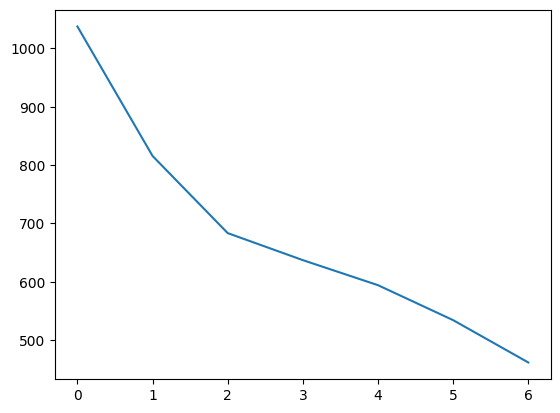

In [51]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [52]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df2_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.28915373549301415
For n_clusters=3, the silhouette score is 0.2878272991957743
For n_clusters=4, the silhouette score is 0.2968544474448952
For n_clusters=5, the silhouette score is 0.25012046163348267
For n_clusters=6, the silhouette score is 0.18680373012110138
For n_clusters=7, the silhouette score is 0.2491885217274235
For n_clusters=8, the silhouette score is 0.20257188180353622


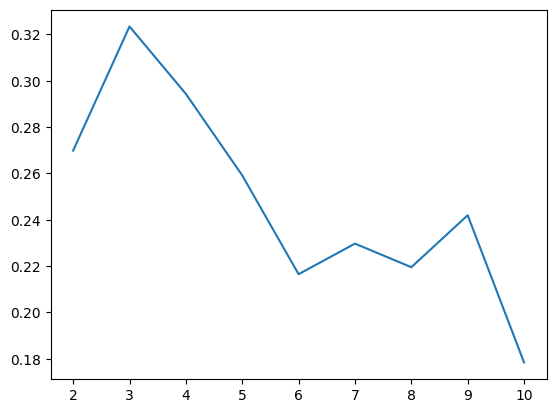

In [54]:

# silhouette analysis plots
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df2_scaled)
    ss.append([k, silhouette_score(df2_scaled, kmeans.labels_)])

sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

In [55]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df2_scaled)

KMeans(max_iter=50, n_clusters=3)

In [56]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [57]:
# assign the label
df['cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


<Axes: xlabel='cluster_id', ylabel='gdpp'>

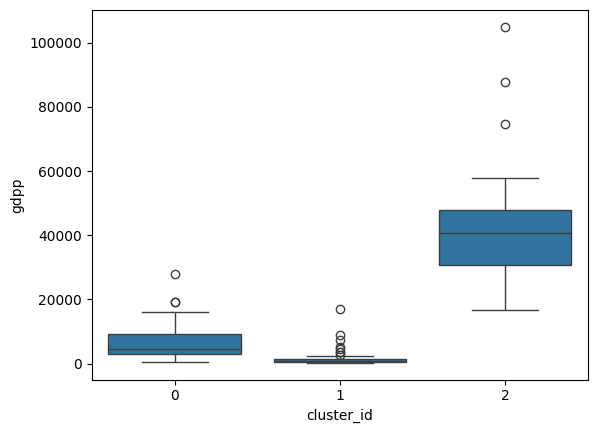

In [58]:
# plot
sns.boxplot(x='cluster_id', y='gdpp', data=df)

In [59]:
df.cluster_id.value_counts()

,count
cluster_id,
0,85
1,46
2,35


<Axes: xlabel='gdpp', ylabel='child_mort'>

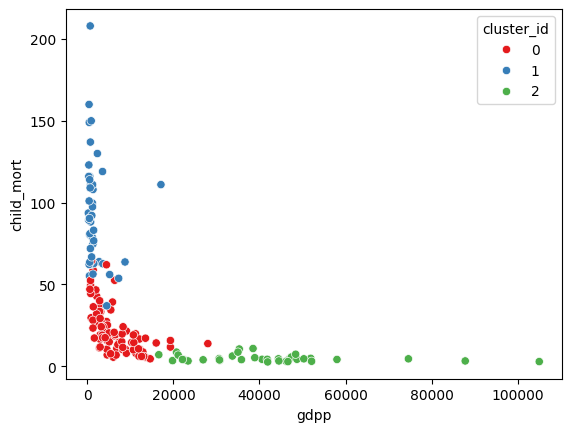

In [60]:
sns.scatterplot(x = 'gdpp', y ='child_mort', hue = 'cluster_id', data = df, palette = 'Set1')

<Axes: xlabel='gdpp', ylabel='income'>

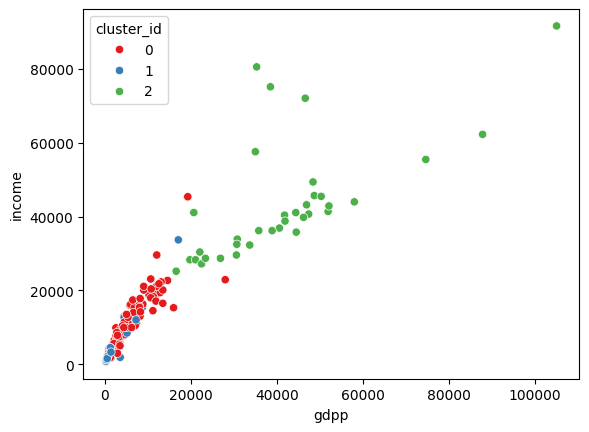

In [61]:
sns.scatterplot(x = 'gdpp', y ='income', hue = 'cluster_id', data = df, palette = 'Set1')

<Axes: xlabel='income', ylabel='child_mort'>

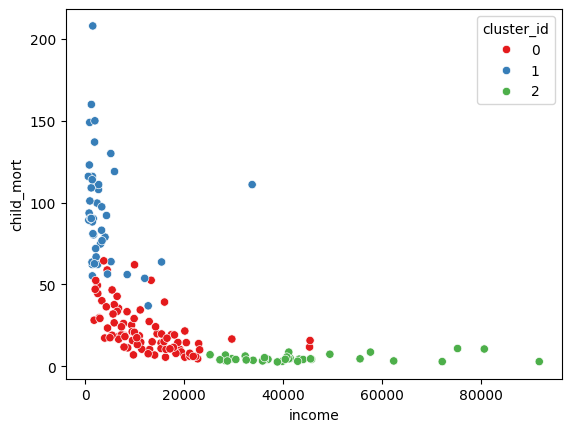

In [62]:
sns.scatterplot(x = 'income', y ='child_mort', hue = 'cluster_id', data = df, palette = 'Set1')

In [68]:
aa = df[['gdpp', 'child_mort', 'income', 'cluster_id']].groupby('cluster_id').mean()

In [69]:
required_cluster = aa.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(1)
reqd = required_cluster.reset_index()
cluster = int(reqd.cluster_id)
cluster

1

<Axes: xlabel='cluster_id', ylabel='child_mort'>

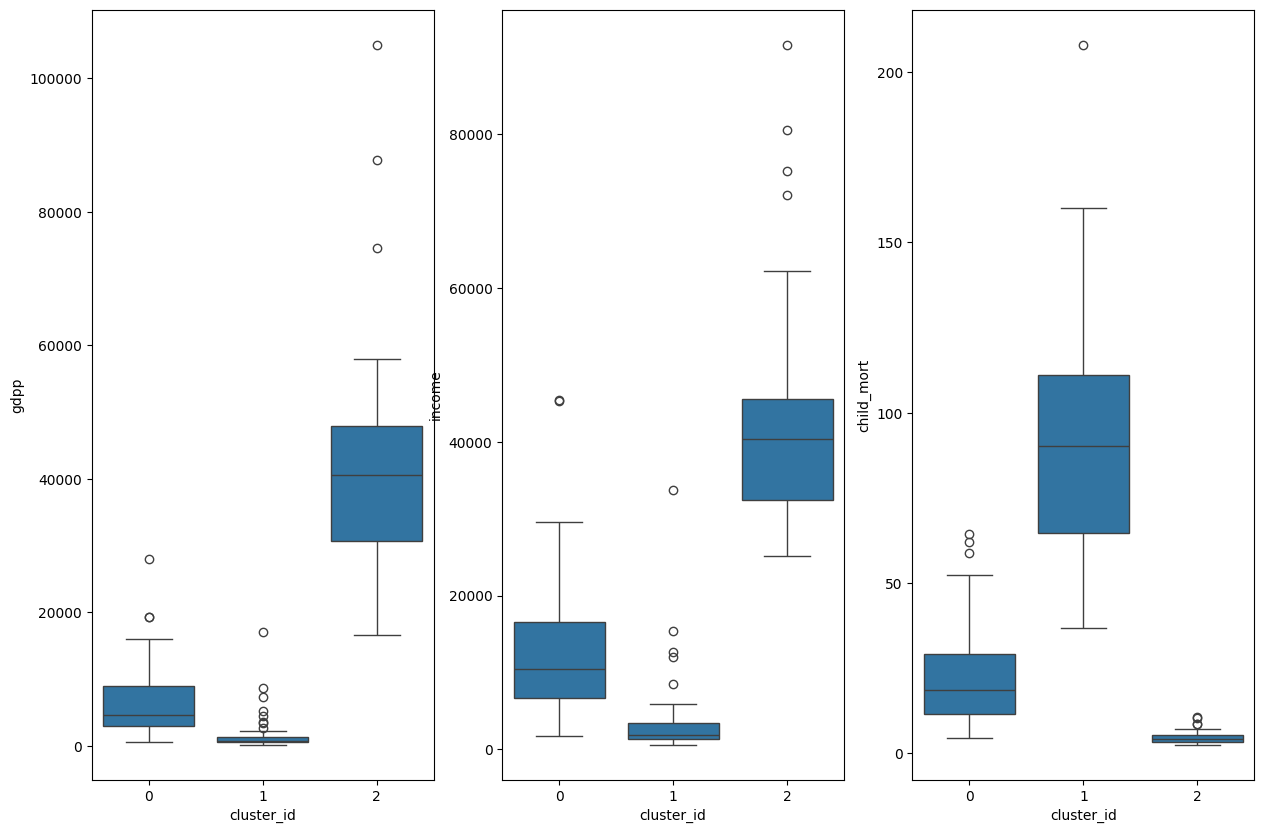

In [74]:
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='gdpp', data= df)


plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='income', data= df)



plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='child_mort', data= df)

In [75]:
c1 = df[df['cluster_id']==cluster]
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1


In [76]:
c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
